In [1]:
import sys
sys.path.append('..')
from models.model_adult import *

import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

{'k_a': 0.8, 'k_PG,f': 0.565, 'k_PS,f': 0.422, 'k_PC,f': 0.0925, 'k_PC,e': 0.132, 'k_P,e': 0.0154, 'k_G,e': 0.00743, 'k_S,e': 0.000664}


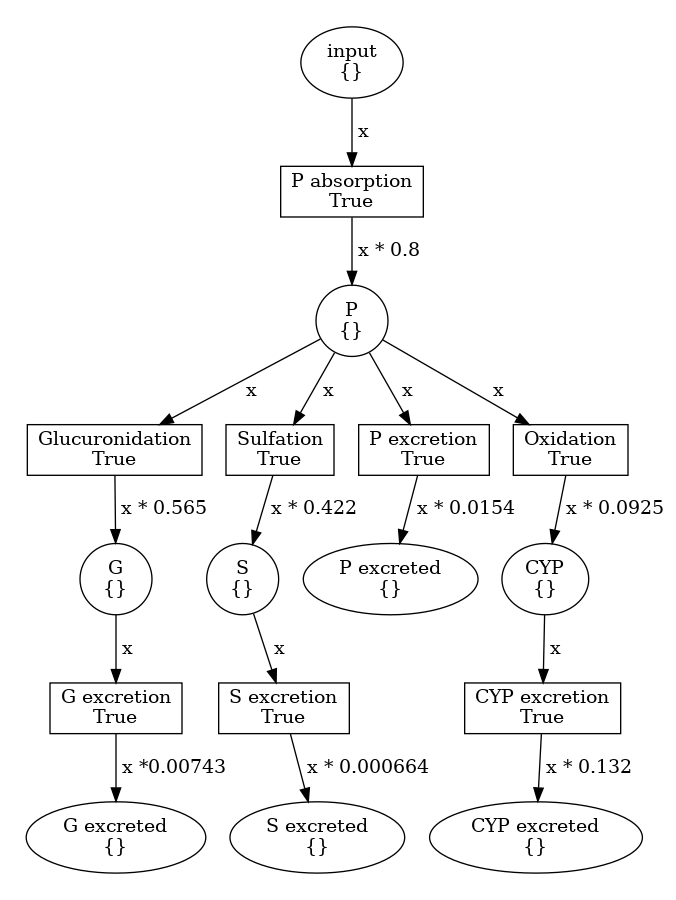

In [2]:
model = AdultModel()
model.save_img('../results/adult_model.png')
Image.open('../results/adult_model.png')

In [3]:
# Expreriment 3
p3 = np.load('../results/exp3/p_val.npy')
s3 = np.load('../results/exp3/s_val.npy')
g3 = np.load('../results/exp3/g_val.npy')
cyp3 = np.load('../results/exp3/cyp_val.npy')
pe3 = np.load('../results/exp3/pe_val.npy')
se3 = np.load('../results/exp3/se_val.npy')
ge3 = np.load('../results/exp3/ge_val.npy')
cype3 = np.load('../results/exp3/cype_val.npy')

In [4]:
def plots(zipped, title, subtitles, linestyle, labels):
  fig, axis = plt.subplots(2,2, figsize=(15,10))
  fig.tight_layout(pad=5.0)
  # fig.suptitle(title, fontsize=24, fontweight='bold')
  i = 0
  for compound in zipped:
    x = i//2
    y = i%2
    axis[x][y].set_title(subtitles[i], size=22)
    axis[x][y].plot(compound[0], color=compound[1], linewidth=4, linestyle=linestyle, label='Experiment 3')
    axis[x][y].set_xlabel(labels[0][0],  fontsize=18)
    axis[x][y].set_ylabel(labels[0][1],  fontsize=18)
    axis[x][y].set_yscale("log", base=10)
    axis[x][y].set_xscale("linear")
    axis[x][y].legend(prop={'size': 10})
    i += 1
  plt.show()

In [5]:
subtitles_exposure = [
  'Paracetamol in homogenate',
  'Paracetamol-glucuronide in homogenate',
  'Paracetamol-sulfate in homogenate',
  'Paracetamol-oxidised in homogenate'
]

colors = [
  'blue',
  'magenta',
  'orange',
  'green'
]

labels_exposure = [
  [
    ('Time (min)'),
    ('Compound (pmoles/larva)')
  ] * 4]
 
title_exposure = 'Internal Exposure'

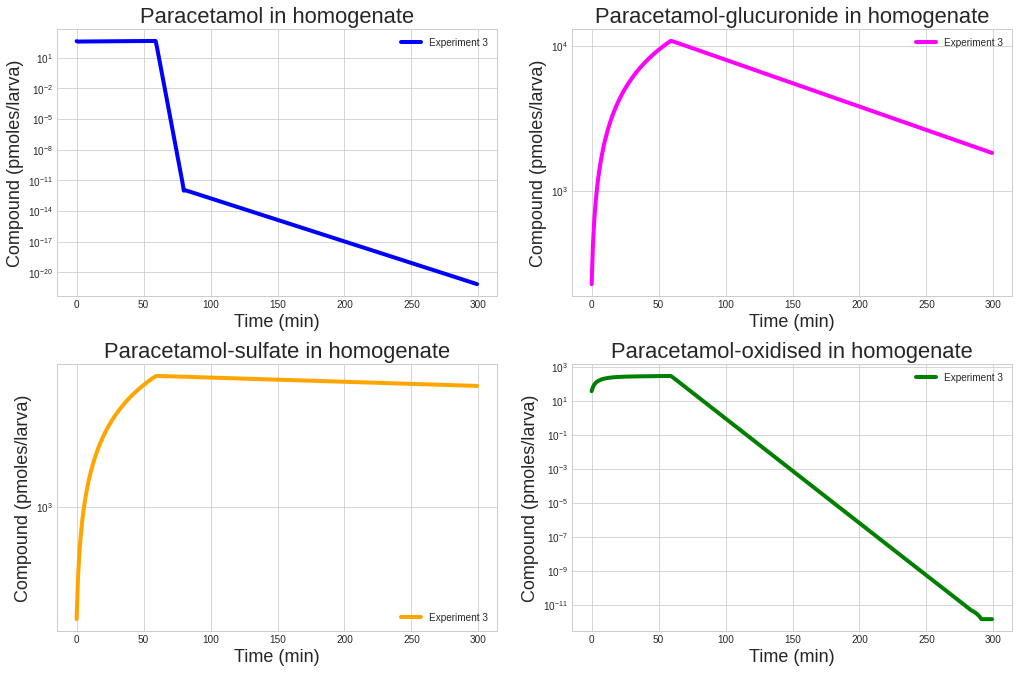

In [6]:
plots(
    zipped = zip([p3, g3, s3, cyp3], colors),
    title=title_exposure,
    subtitles=subtitles_exposure,
    labels=labels_exposure,
    linestyle='solid'
  )

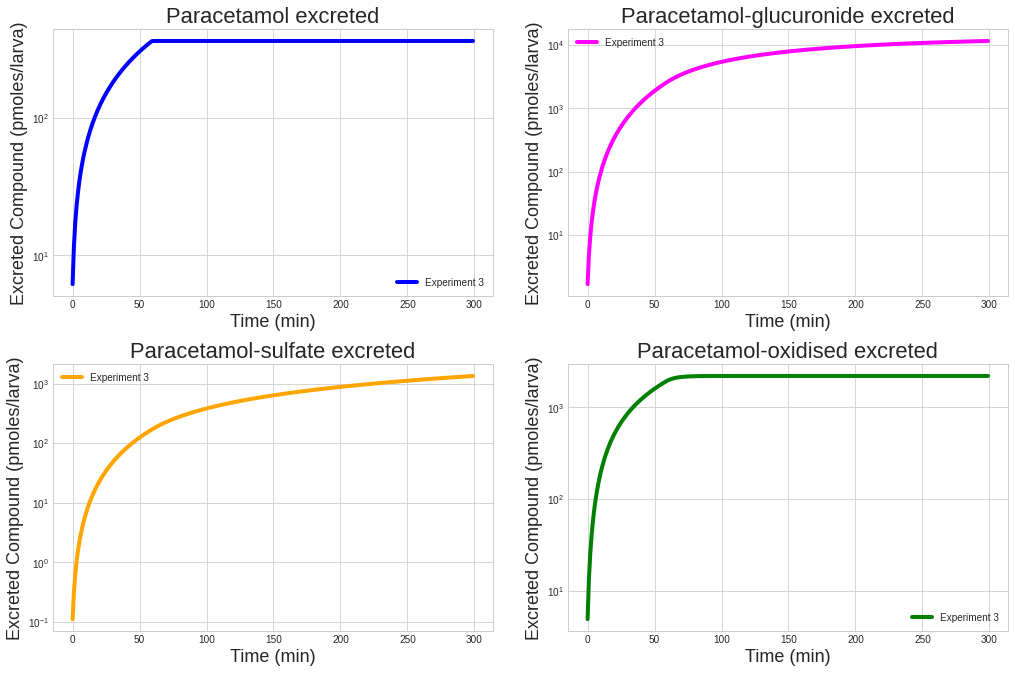

In [7]:
title_excreted = 'Excreted Compound'
subtitles_excreted = [
  'Paracetamol excreted',
  'Paracetamol-glucuronide excreted',
  'Paracetamol-sulfate excreted',
  'Paracetamol-oxidised excreted'
]
labels_excreted = [
  [
    ('Time (min)'),
    ('Excreted Compound (pmoles/larva)')
  ]*4
]

plots(
    zipped = zip([pe3, ge3, se3, cype3], colors),
    title=title_excreted,
    subtitles=subtitles_excreted,
    labels=labels_excreted,
    linestyle='solid'
  )